<a href="https://www.kaggle.com/benguatici/fortune-global-2000-companies?scriptVersionId=84966651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a name="indexID"></a>
<font size="5" color="orange"> INDEX </font>

### [1) Exploratory Data Analysis](#EDA)
##### [1.1) Correlation Heatmap](#corr)
##### [1.2) Scatter Plot of Profit vs Market Value](#scat)
##### [1.3) Top 10 Companies based on Sales](#10sales)
##### [1.4) Top 10 Companies based on Profit](#10profit)
##### [1.5) Top 10 Companies based on Profit to Sales Ratio](#10profitsales)
##### [1.6) Top 10 Companies based on Assets](#10assets)
##### [1.7) Top 10 Companies based on Market Value](#10value)
##### [1.8) Top 10 Companies based on Market Value to Profit Ratio](#10marketprofit)
##### [1.9) Percentage of Total Market Value of Top 5 Countries](#5country)

## <a name="EDA"> 1) Exploratory Data Analysis

[Index](#indexID)

In [1]:
#import necessary libraries
import numpy as np 
import pandas as pd

#get the file path to the data set
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filePath=os.path.join(dirname, filename)
        print(filePath)
        

/kaggle/input/fortune-global-2000-companies-till-2021/fortune_2000_in_2021.csv


In [2]:
#read the data set
df=pd.read_csv(filePath)
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"


In [3]:
print("Shape of the data set is :"+str(df.shape))

Shape of the data set is :(2000, 7)


In [4]:
#check data types and null values
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [5]:
#check the rows with the null values
nan_values = df[df.isna().any(axis=1)]   
print(nan_values)

      Rank            Name Country   Sales    Profit Assets Market Value
1932  1933  Bank of Greece  Greece  $1.3 B  $942.8 M    NaN       $366 M


In [6]:
#replace null values with 0
df["Assets"]=df["Assets"].replace(np.nan,0)

In [7]:
#format the currency features
numFeatures=df.columns
numFeatures=numFeatures[3:]

for col in numFeatures:
    df[col]=df[col].astype(str).str.replace(' ','')
    df[col]=df[col].astype(str).str.replace(',','')
    df[col]=df[col].astype(str).str.replace('$','')
    
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,190.5B,45.8B,4914.7B,249.5B
1,2,JPMorgan Chase,United States,136.2B,40.4B,3689.3B,464.8B
2,3,Berkshire Hathaway,United States,245.5B,42.5B,873.7B,624.4B
3,4,China Construction Bank,China,173.5B,39.3B,4301.7B,210.4B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7B,49.3B,510.3B,1897.2B


In [8]:
#replace B and M with the numeric values
for col in numFeatures:
    df[col]=df[col].astype(str).replace({"M": "*1e6","B": "*1e9"},regex=True).map(pd.eval)

In [9]:
#get the numerical and categorical features
numericalFeatures=df.select_dtypes(exclude="object").columns
#treat rank as categorical
numericalFeatures=numericalFeatures[1:]
categoricalFeatures=df.select_dtypes(include="object").columns
print(numericalFeatures)

Index(['Sales', 'Profit', 'Assets', 'Market Value'], dtype='object')


In [10]:
#check the correlation
df[numericalFeatures].corr()

,Sales,Profit,Assets,Market Value
Sales,1.000000,0.470324,0.371317,0.508309
Profit,0.470324,1.000000,0.442876,0.701474
Assets,0.371317,0.442876,1.000000,0.154344
Market Value,0.508309,0.701474,0.154344,1.000000


## <a name="corr"> 1.1) Correlation Heatmap

[Index](#indexID)

Text(0.5, 1.0, 'Correlation between Features')

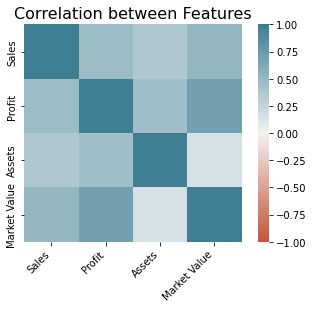

In [11]:
#visualize correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[numericalFeatures].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation between Features", fontsize=16)

<b>Interpretation</b>: Correlation coefficient between Profit and Market Value is 0.701474. 
As this ratio is greater than 0.5, we may say that there is a correlation between them.

## <a name="scat"> 1.2) Scatter Plot of Profit vs Market Value

[Index](#indexID)

Text(0, 0.5, 'Market Value')

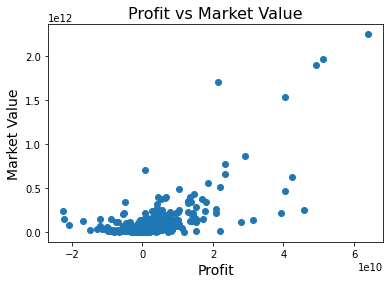

In [12]:
plt.scatter(df["Profit"],df["Market Value"])
plt.title("Profit vs Market Value",fontsize=16)
plt.xlabel("Profit",fontsize=14)
plt.ylabel("Market Value",fontsize=14)

## <a name="10sales"> 1.3) Top 10 Companies based on Sales

[Index](#indexID)

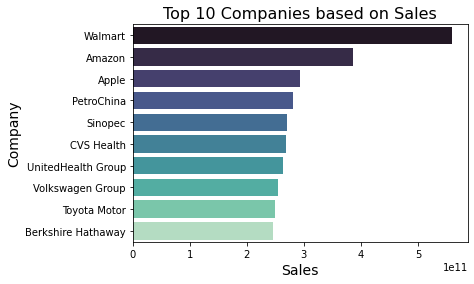

In [13]:
dfSales=df.sort_values(by="Sales",ascending=False).iloc[:10]

fig,ax = plt.subplots()
sns.barplot(x="Sales", y="Name", data=dfSales, palette='mako')
plt.xlabel("Sales",fontsize=14)
plt.ylabel("Company",fontsize=14)
plt.title("Top 10 Companies based on Sales", fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

<b>Interpretation</b>: Walmart is the company with the highest sales.

## <a name="10profit"> 1.4) Top 10 Companies based on Profit

[Index](#indexID)

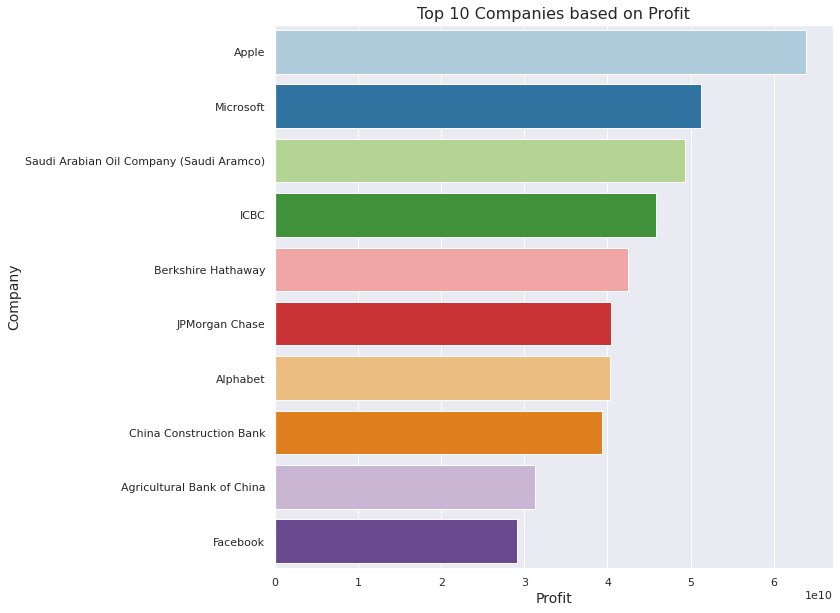

In [14]:
dfProfit=df.sort_values(by="Profit",ascending=False).iloc[:10]

fig,ax = plt.subplots()
sns.barplot(x="Profit", y="Name", data=dfProfit, palette='Paired')
plt.xlabel("Profit",fontsize=14)
plt.ylabel("Company",fontsize=14)
plt.title("Top 10 Companies based on Profit", fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

<b>Interpretation</b>: Although Walmart is the company that has the highest sales, Apple is the company with the highest profit. We may infer that the profit margin ratio of Walmart is less than Apple.

## <a name="10profitsales"> 1.5) Top 10 Companies based on Profit to Sales Ratio

[Index](#indexID)

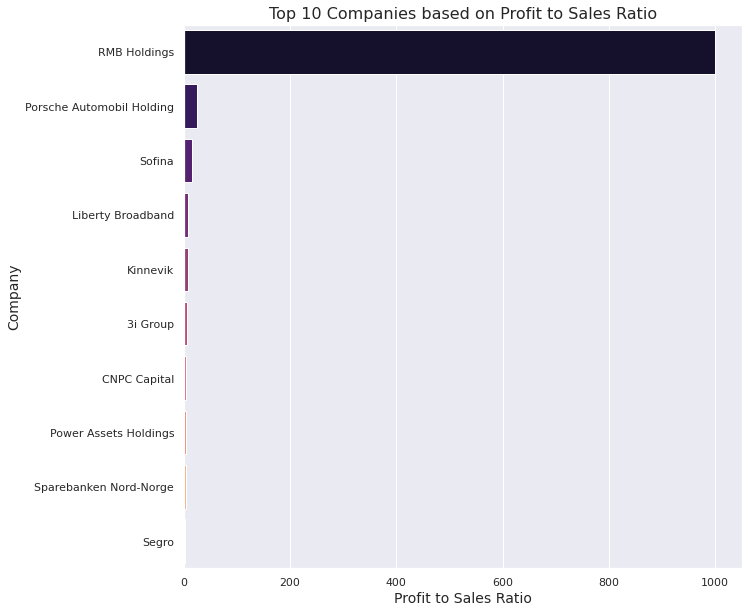

In [15]:
df["ProfitOverSales"]=df["Profit"]/df["Sales"]
dfProfitOverSales=df.sort_values(by="ProfitOverSales",ascending=False).iloc[:10]

fig,ax = plt.subplots()
sns.barplot(x="ProfitOverSales", y="Name", data=dfProfitOverSales, palette='magma')
plt.xlabel("Profit to Sales Ratio",fontsize=14)
plt.ylabel("Company",fontsize=14)
plt.title("Top 10 Companies based on Profit to Sales Ratio", fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

<b>Interpretation</b>: RMB Holdings has the highest profit to sales ratio. That means the company has the highest percentage of sales turned into profit.

## <a name="10assets"> 1.6) Top 10 Companies based on Assets

[Index](#indexID)

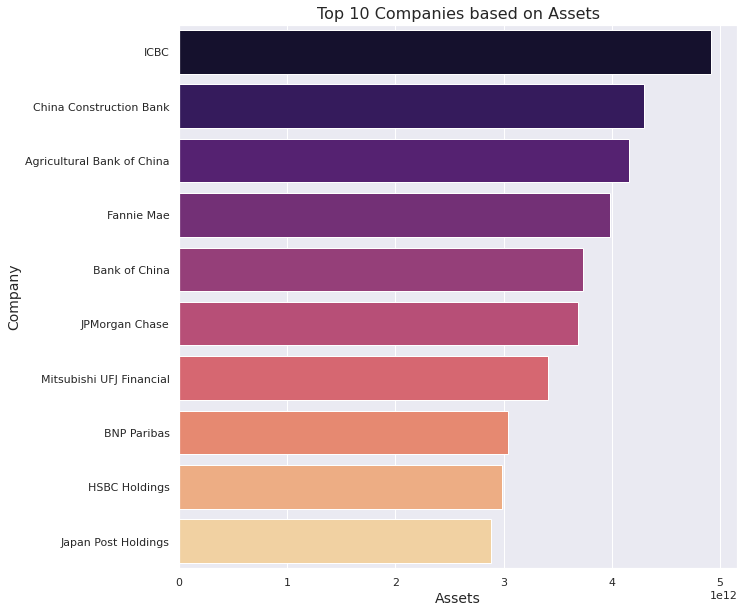

In [16]:
dfAssets=df.sort_values(by="Assets",ascending=False).iloc[:10]

fig,ax = plt.subplots()
sns.barplot(x="Assets", y="Name", data=dfAssets, palette='magma')
plt.xlabel("Assets",fontsize=14)
plt.ylabel("Company",fontsize=14)
plt.title("Top 10 Companies based on Assets", fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

<b>Interpretation</b>: ICBC is the company with the highest assets.

## <a name="10value"> 1.7) Top 10 Companies based on Market Value

[Index](#indexID)

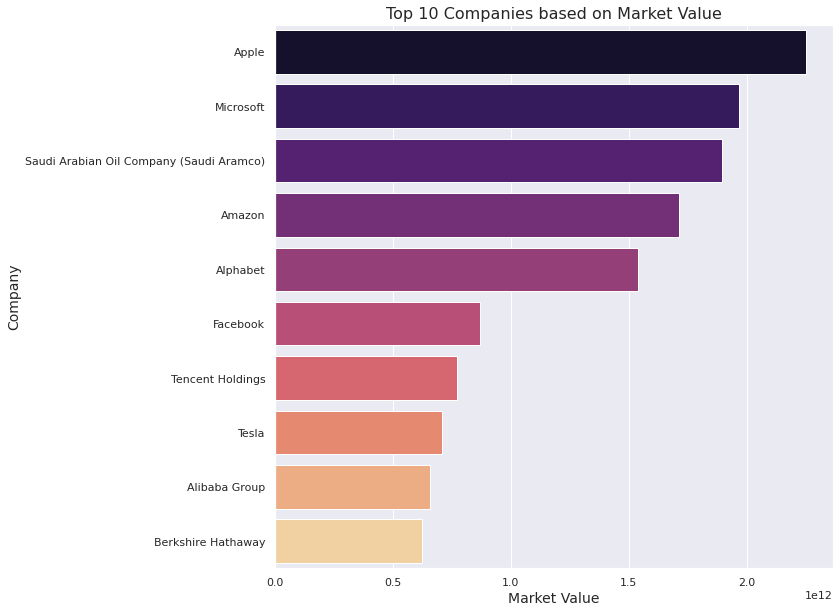

In [17]:
dfMarket=df.sort_values(by="Market Value",ascending=False).iloc[:10]

fig,ax = plt.subplots()
sns.barplot(x="Market Value", y="Name", data=dfMarket, palette='magma')
plt.xlabel("Market Value",fontsize=14)
plt.ylabel("Company",fontsize=14)
plt.title("Top 10 Companies based on Market Value", fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

<b>Interpretation</b>: Apple has the highest market value.

## <a name="10marketprofit"> 1.8) Top 10 Companies based on Market Value to Profit Ratio

[Index](#indexID)

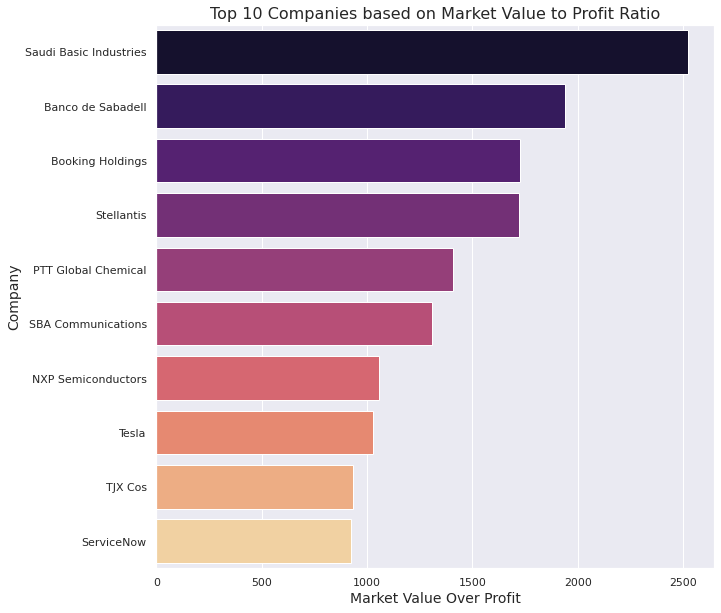

In [18]:
df["MarketOverProfit"]=df["Market Value"]/df["Profit"]
dfMarketOverProfit=df.sort_values(by="MarketOverProfit",ascending=False).iloc[:10]

fig,ax = plt.subplots()
sns.barplot(x="MarketOverProfit", y="Name", data=dfMarketOverProfit, palette='magma')
plt.xlabel("Market Value Over Profit",fontsize=14)
plt.ylabel("Company",fontsize=14)
plt.title("Top 10 Companies based on Market Value to Profit Ratio", fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

<b>Interpretation</b>: From Figure 1.2, it can be seen that there is a correlation between profit and the market value. This make sense as it is expected as the profit goes higher, the market value will be higher. Thus, investigation of companies based on market value to profit ratio make sense. 

Saudi Basic Industries has the highest market value to profit ratio. One can infer that this company is making more and more market value per unit profit.

## <a name="5country"> 1.9) Percentage of Total Market Value of Top 5 Countries

[Index](#indexID)

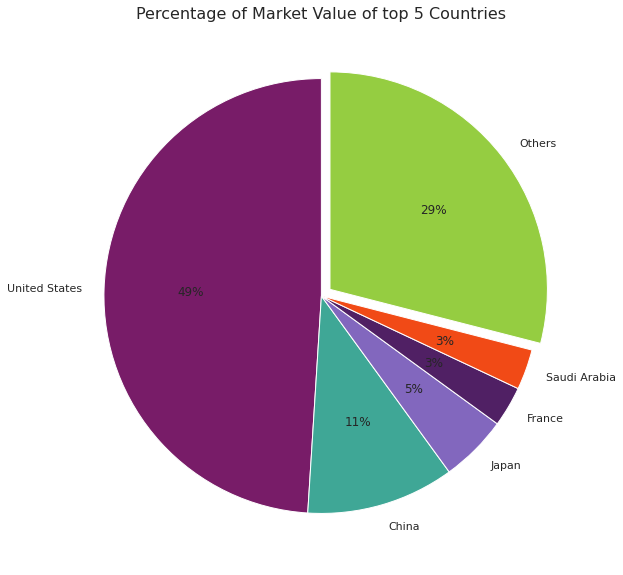

In [19]:
dfGlobal=(df.pivot_table(index="Country",values=["Market Value"],aggfunc="sum").sort_values("Market Value",ascending=False).iloc[:5])
globalSum=df["Market Value"].sum()
dfGlobalShare=np.round((dfGlobal/globalSum)*100)
othersShare=100-dfGlobalShare.sum()
dfGlobalShare.loc[len(dfGlobalShare.index)]=[float(othersShare)]
dfGlobalShare.rename(index={5:'Others'},inplace=True)

dfGlobalShare.index

labels =dfGlobalShare.index
sizes = dfGlobalShare["Market Value"]
explode = (0,0,0,0,0,0.05)  
colors = ['#781C68','#3FA796','#8267BE','#502064','#F14A16','#95CD41']

plt.pie(sizes, explode=explode, labels=labels,autopct='%1.0f%%', shadow=False, startangle=90, colors=colors)

plt.title("Percentage of Market Value of top 5 Countries", fontsize=16)
plt.show()

<b>Interpretation</b>: Total market value of companies in United States has the 49% of the total market value. 